In [ ]:
'''
Formulación de Hipótesis
Formularemos varias hipótesis para analizar:

Hipótesis 1: Los jugadores con una calificación más alta tienden a ganar más partidas.
Vamos a comparar las calificaciones promedio de los jugadores ganadores (blanco y negro) y perdedores.
Hipótesis 2: Las partidas con un mayor número de turnos tienden a terminar en tablas.
Vamos a analizar la distribución de la cantidad de turnos para diferentes estados de victoria.
Hipótesis 3: Ciertas aperturas específicas tienen una mayor tasa de victorias para las blancas o las negras.
Vamos a calcular las tasas de victoria para las aperturas más comunes. El resultado de la partida (victoria de blancas o negras) depende del tipo de apertura utilizado.
'''

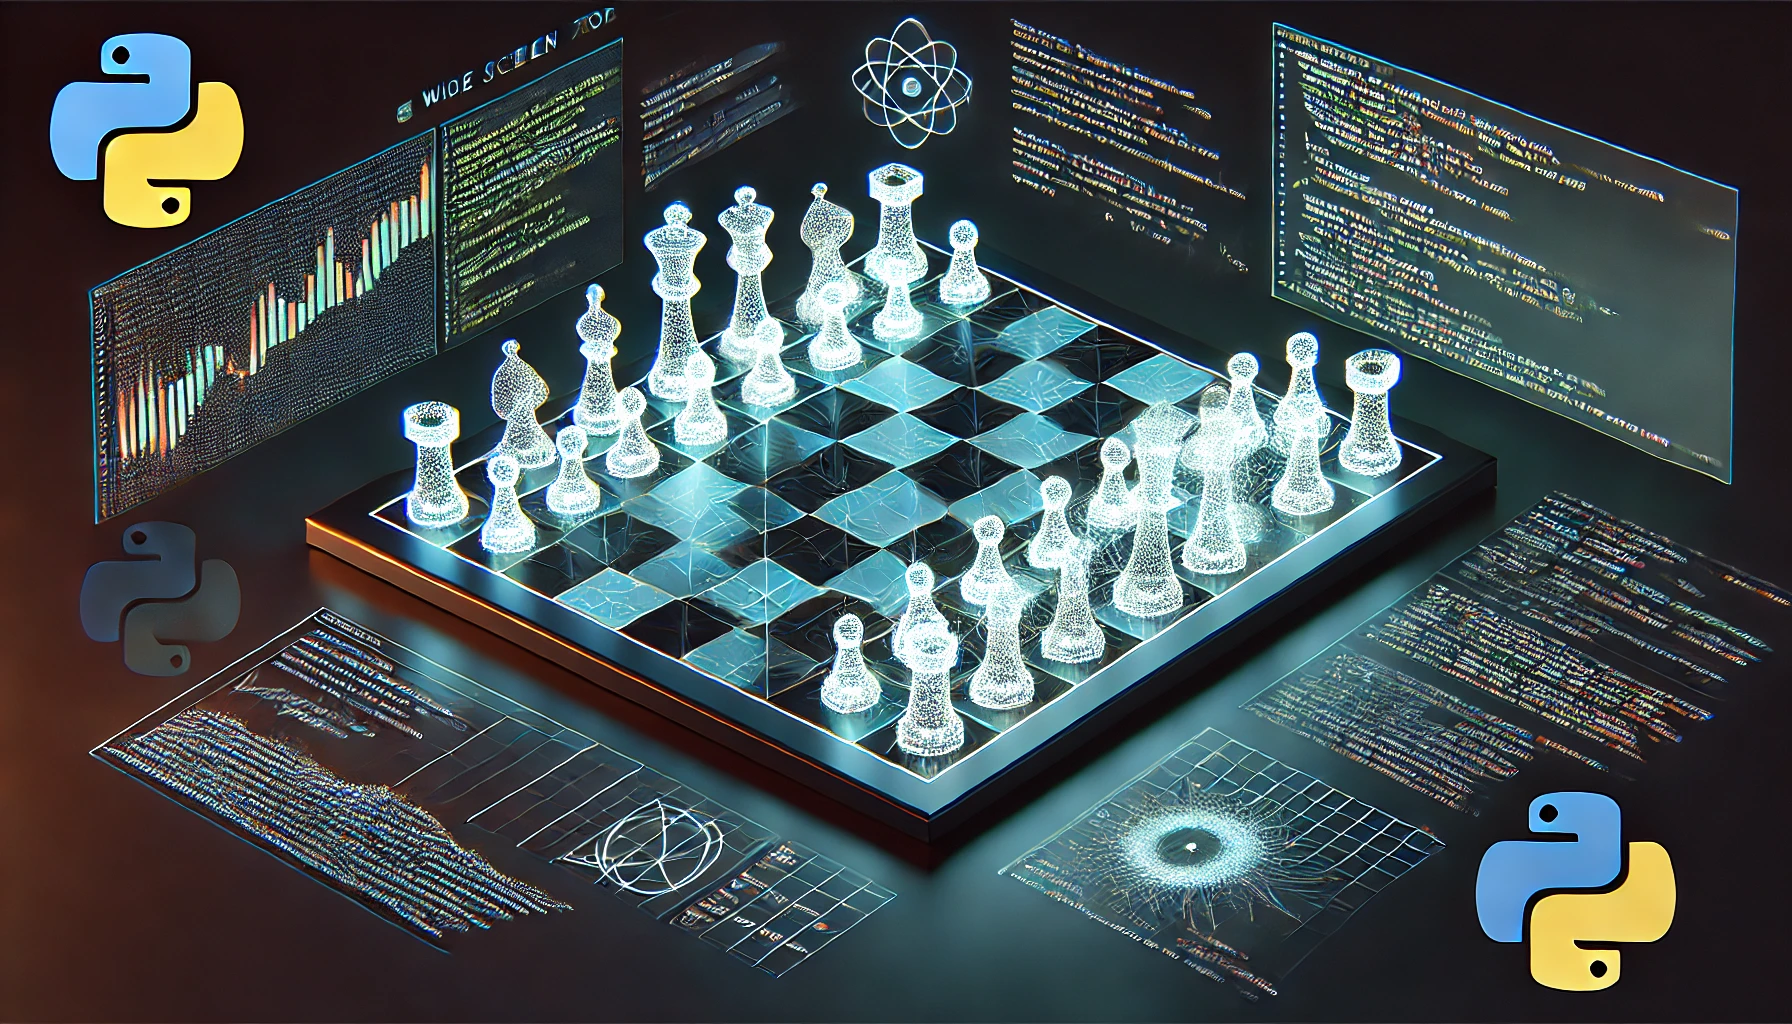

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset
df_chess = pd.read_csv("../data/games.csv")

# Display the first few rows of the dataset
df_chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
# Data structure overview
data_info = df_chess.info()

# Check for missing values
missing_values = df_chess.isnull().sum()

print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
id        

In [6]:
# Check for duplicate records
duplicates = df_chess.duplicated().sum()

# Remove duplicates if any
chess_data_cleaned = df_chess.drop_duplicates()

duplicates, chess_data_cleaned.shape

(429, (19629, 16))

In [6]:
chess_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19629 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19629 non-null  object 
 1   rated           19629 non-null  bool   
 2   created_at      19629 non-null  float64
 3   last_move_at    19629 non-null  float64
 4   turns           19629 non-null  int64  
 5   victory_status  19629 non-null  object 
 6   winner          19629 non-null  object 
 7   increment_code  19629 non-null  object 
 8   white_id        19629 non-null  object 
 9   white_rating    19629 non-null  int64  
 10  black_id        19629 non-null  object 
 11  black_rating    19629 non-null  int64  
 12  moves           19629 non-null  object 
 13  opening_eco     19629 non-null  object 
 14  opening_name    19629 non-null  object 
 15  opening_ply     19629 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


In [13]:
winners.groupby('winner')[['white_rating']].mean().reset_index()

,winner,white_rating
0,black,1549.161117
1,white,1633.757659


In [14]:
winners.groupby('winner')[['black_rating']].mean().reset_index()

,winner,black_rating
0,black,1637.666891
1,white,1538.560151


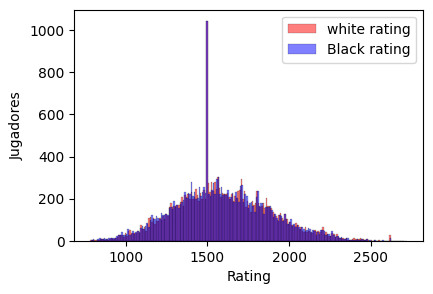

In [11]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(chess_data_cleaned["white_rating"],
             kde=False,
             color='r',
             bins=200,alpha=0.5, ax = axs,label = "white rating") # Otra forma, sin recurrir al dataframe como argumento
sns.histplot(chess_data_cleaned["black_rating"],
             kde=False,
             color='b',
             bins=200,alpha=0.5, ax = axs,label = "Black rating") # Otra forma, sin recurrir al dataframe como argumento
axs.set_xlabel("Rating")
axs.legend()
axs.set_ylabel("Jugadores");

Prueba t para jugadores blancos: t-stat=20.239287750469007, p-value=4.10727155969413e-90
Prueba t para jugadores negros: t-stat=23.715480341964483, p-value=1.6926103957334823e-122
Prueba t para jugadores blancos: u-stat=50495725.5, p-value=1.919101851278636e-76
Prueba t para jugadores negros: u-stat=51737988.5, p-value=4.98434331048172e-106


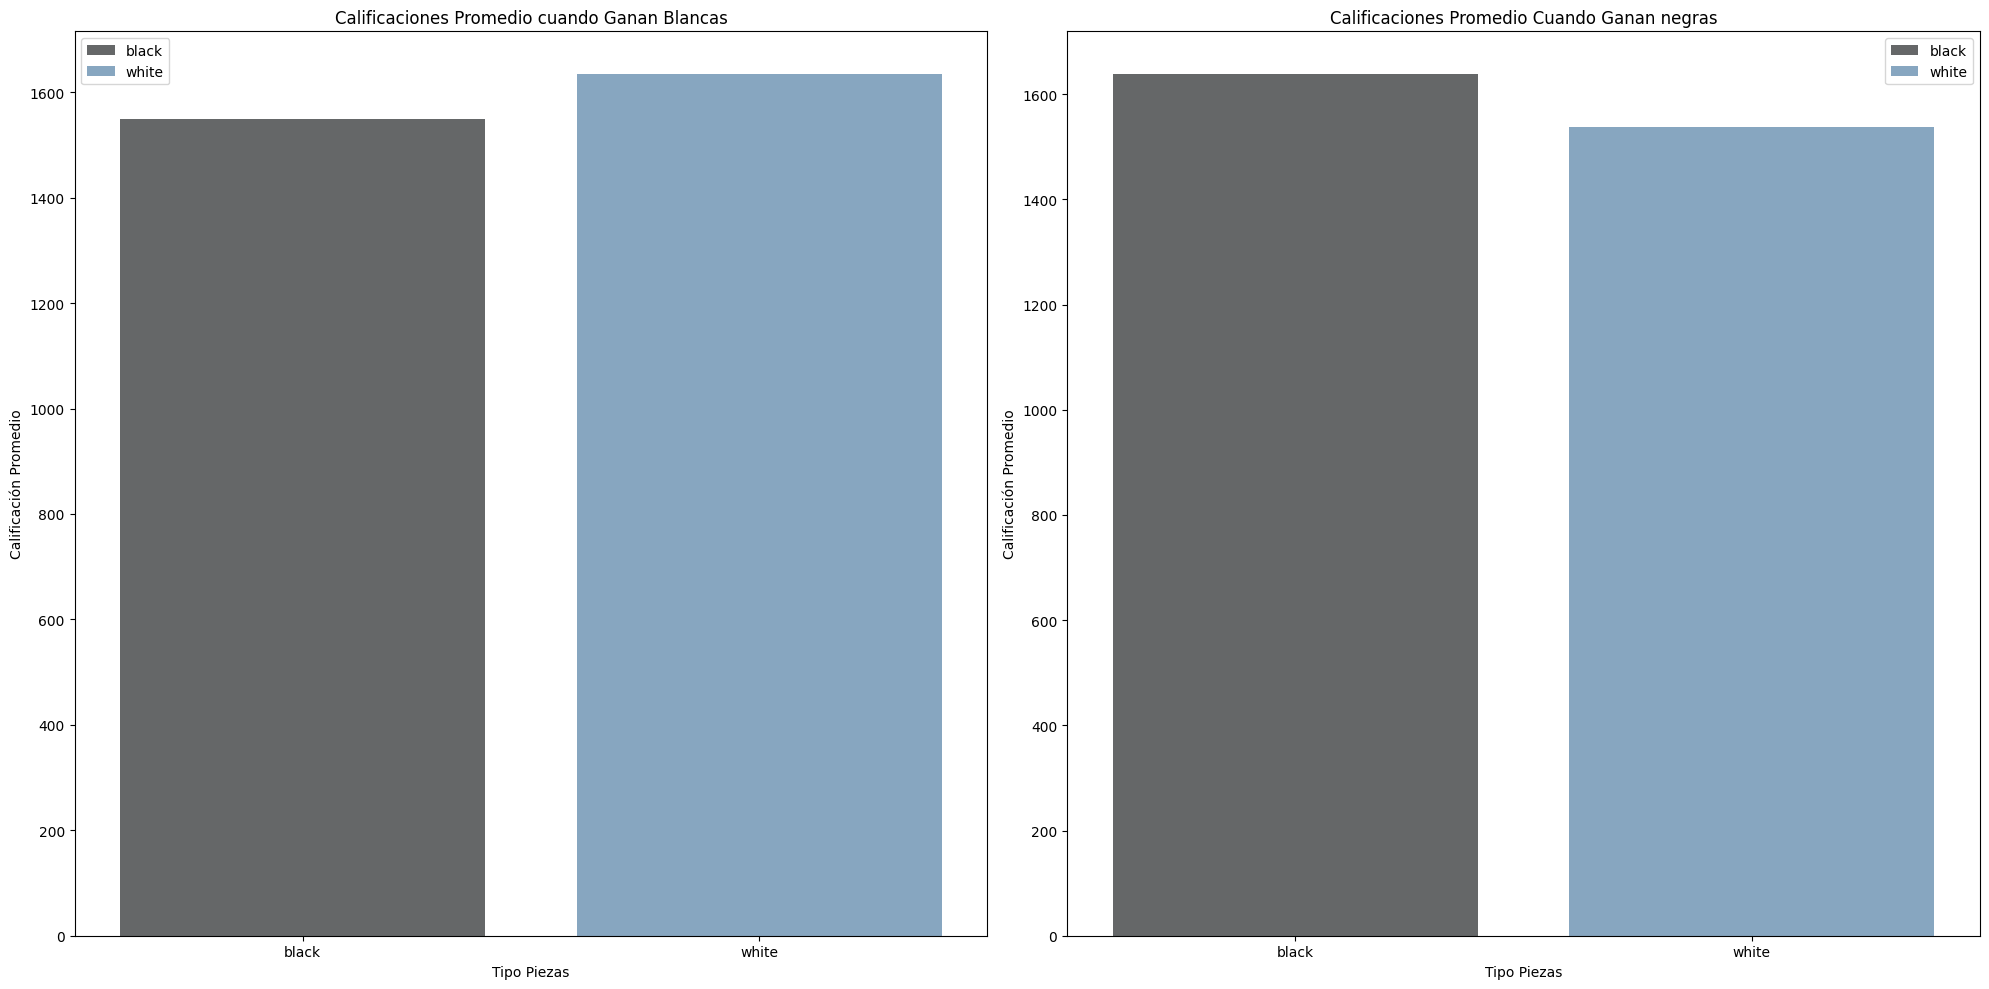

In [12]:
'''
Hipótesis 1: Los jugadores con una calificación más alta tienden a ganar más partidas.
'''
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Filtrar datos de ganadores y perdedores
winners = chess_data_cleaned[chess_data_cleaned['winner'] != 'draw']
losers = chess_data_cleaned[chess_data_cleaned['winner'] != 'draw']

# Calificaciones de ganadores y perdedores
white_winners = winners[winners['winner'] == 'white']['white_rating']
black_winners = winners[winners['winner'] == 'black']['black_rating']
white_losers = losers[losers['winner'] == 'black']['white_rating']
black_losers = losers[losers['winner'] == 'white']['black_rating']

# Prueba t para ganadores vs perdedores
t_stat_white, p_val_white = ttest_ind(white_winners, white_losers, equal_var=False)
t_stat_black, p_val_black = ttest_ind(black_winners, black_losers, equal_var=False)

u_stat_white, p_valor_white = mannwhitneyu(white_winners, white_losers)
u_stat_black, p_valor_black = mannwhitneyu(black_winners, black_losers)

# Visualización con Seaborn
fig, axs = plt.subplots(1,2,figsize=(20, 10))

# Calificaciones de los ganadores
average_ratings_winners_white = winners.groupby('winner')[['white_rating']].mean().reset_index()
average_ratings_winners_black = winners.groupby('winner')[['black_rating']].mean().reset_index()
sns.barplot(x='winner', y='white_rating',  data=average_ratings_winners_white,hue= "winner" ,alpha=0.7, legend=True, palette='dark:steelblue', ax=axs[0])
sns.barplot(x='winner', y='black_rating', data=average_ratings_winners_black,hue= "winner" ,alpha=0.7, legend=True, palette='dark:steelblue',ax=axs[1])



axs[0].set_title('Calificaciones Promedio cuando Ganan Blancas')
axs[0].set_ylabel('Calificación Promedio',loc="center")
axs[0].set_xlabel('Tipo Piezas',loc="center")
axs[1].set_title('Calificaciones Promedio Cuando Ganan negras')
axs[1].set_ylabel('Calificación Promedio',loc="center")
axs[1].set_xlabel('Tipo Piezas',loc="center")
axs[0].legend()
axs[1].legend()
plt.tight_layout()

print(f"Prueba t para jugadores blancos: t-stat={t_stat_white}, p-value={p_val_white}")
print(f"Prueba t para jugadores negros: t-stat={t_stat_black}, p-value={p_val_black}")
print(f"Prueba t para jugadores blancos: u-stat={u_stat_white}, p-value={p_valor_white}")
print(f"Prueba t para jugadores negros: u-stat={u_stat_black}, p-value={p_valor_black}")

In [17]:
winners.groupby('winner')[['white_rating']].mean().reset_index()

,winner,white_rating
0,black,1549.161117
1,white,1633.757659


In [16]:
winners.groupby('winner')[['black_rating']].mean().reset_index()

,winner,black_rating
0,black,1637.666891
1,white,1538.560151


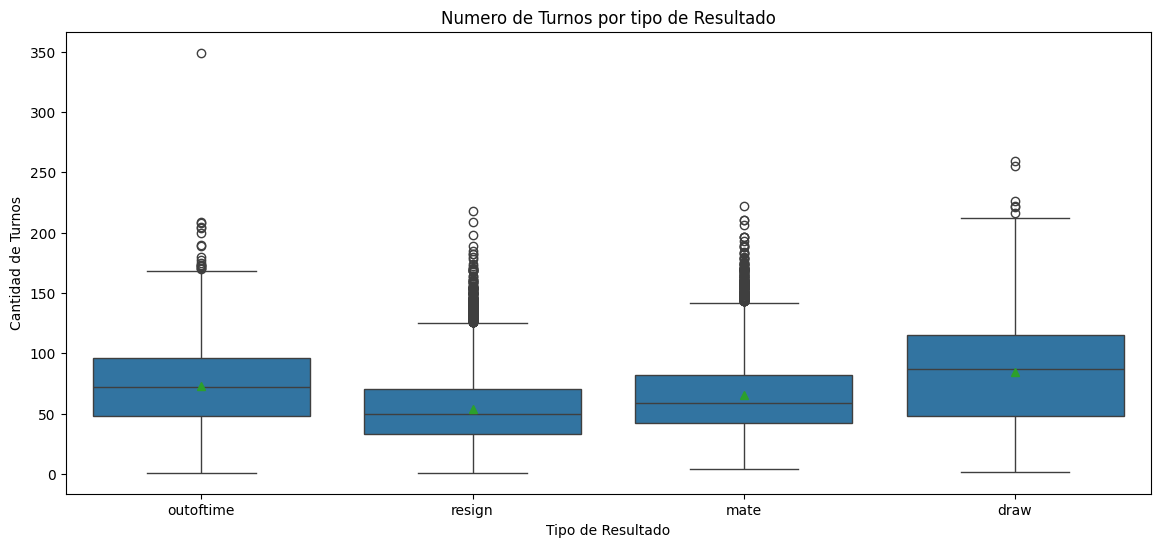

Prueba ANOVA: f-stat=436.5663358578875, p-value=1.3708373788127338e-274


<Figure size 640x480 with 0 Axes>

In [45]:
'''
Hipótesis 3: Las partidas con un mayor número de turnos tienden a terminar en tablas.
'''

from scipy.stats import f_oneway

# Filtrar turnos por estado de victoria
turns_draw = chess_data_cleaned[chess_data_cleaned['victory_status'] == 'draw']['turns']
turns_mate = chess_data_cleaned[chess_data_cleaned['victory_status'] == 'mate']['turns']
turns_outoftime = chess_data_cleaned[chess_data_cleaned['victory_status'] == 'outoftime']['turns']
turns_resign = chess_data_cleaned[chess_data_cleaned['victory_status'] == 'resign']['turns']

# Prueba ANOVA
f_stat, p_val = f_oneway(turns_draw, turns_mate, turns_outoftime, turns_resign)

# Visualización con Seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(x='victory_status', y='turns', data=chess_data_cleaned, showmeans=True)
plt.title('Numero de Turnos por tipo de Resultado')
plt.xlabel('Tipo de Resultado')
plt.ylabel('Cantidad de Turnos')
plt.show()
plt.tight_layout()

print(f"Prueba ANOVA: f-stat={f_stat}, p-value={p_val}")

In [19]:
common_openings = chess_data_cleaned['opening_name'].value_counts().head(15).index
top_openings_data = chess_data_cleaned[chess_data_cleaned['opening_name'].isin(common_openings)]

In [7]:
top_openings_data.groupby(['opening_name', 'winner']).size().unstack().fillna(0)

winner,black,draw,white
opening_name,,,
Caro-Kann Defense,83,7,106
French Defense: Knight Variation,118,14,133
Horwitz Defense,93,5,110
Indian Game,99,12,69
Modern Defense,86,6,81
Philidor Defense #2,95,8,87
Philidor Defense #3,64,4,120
Queen's Pawn Game: Chigorin Variation,107,8,109
Queen's Pawn Game: Mason Attack,102,12,116


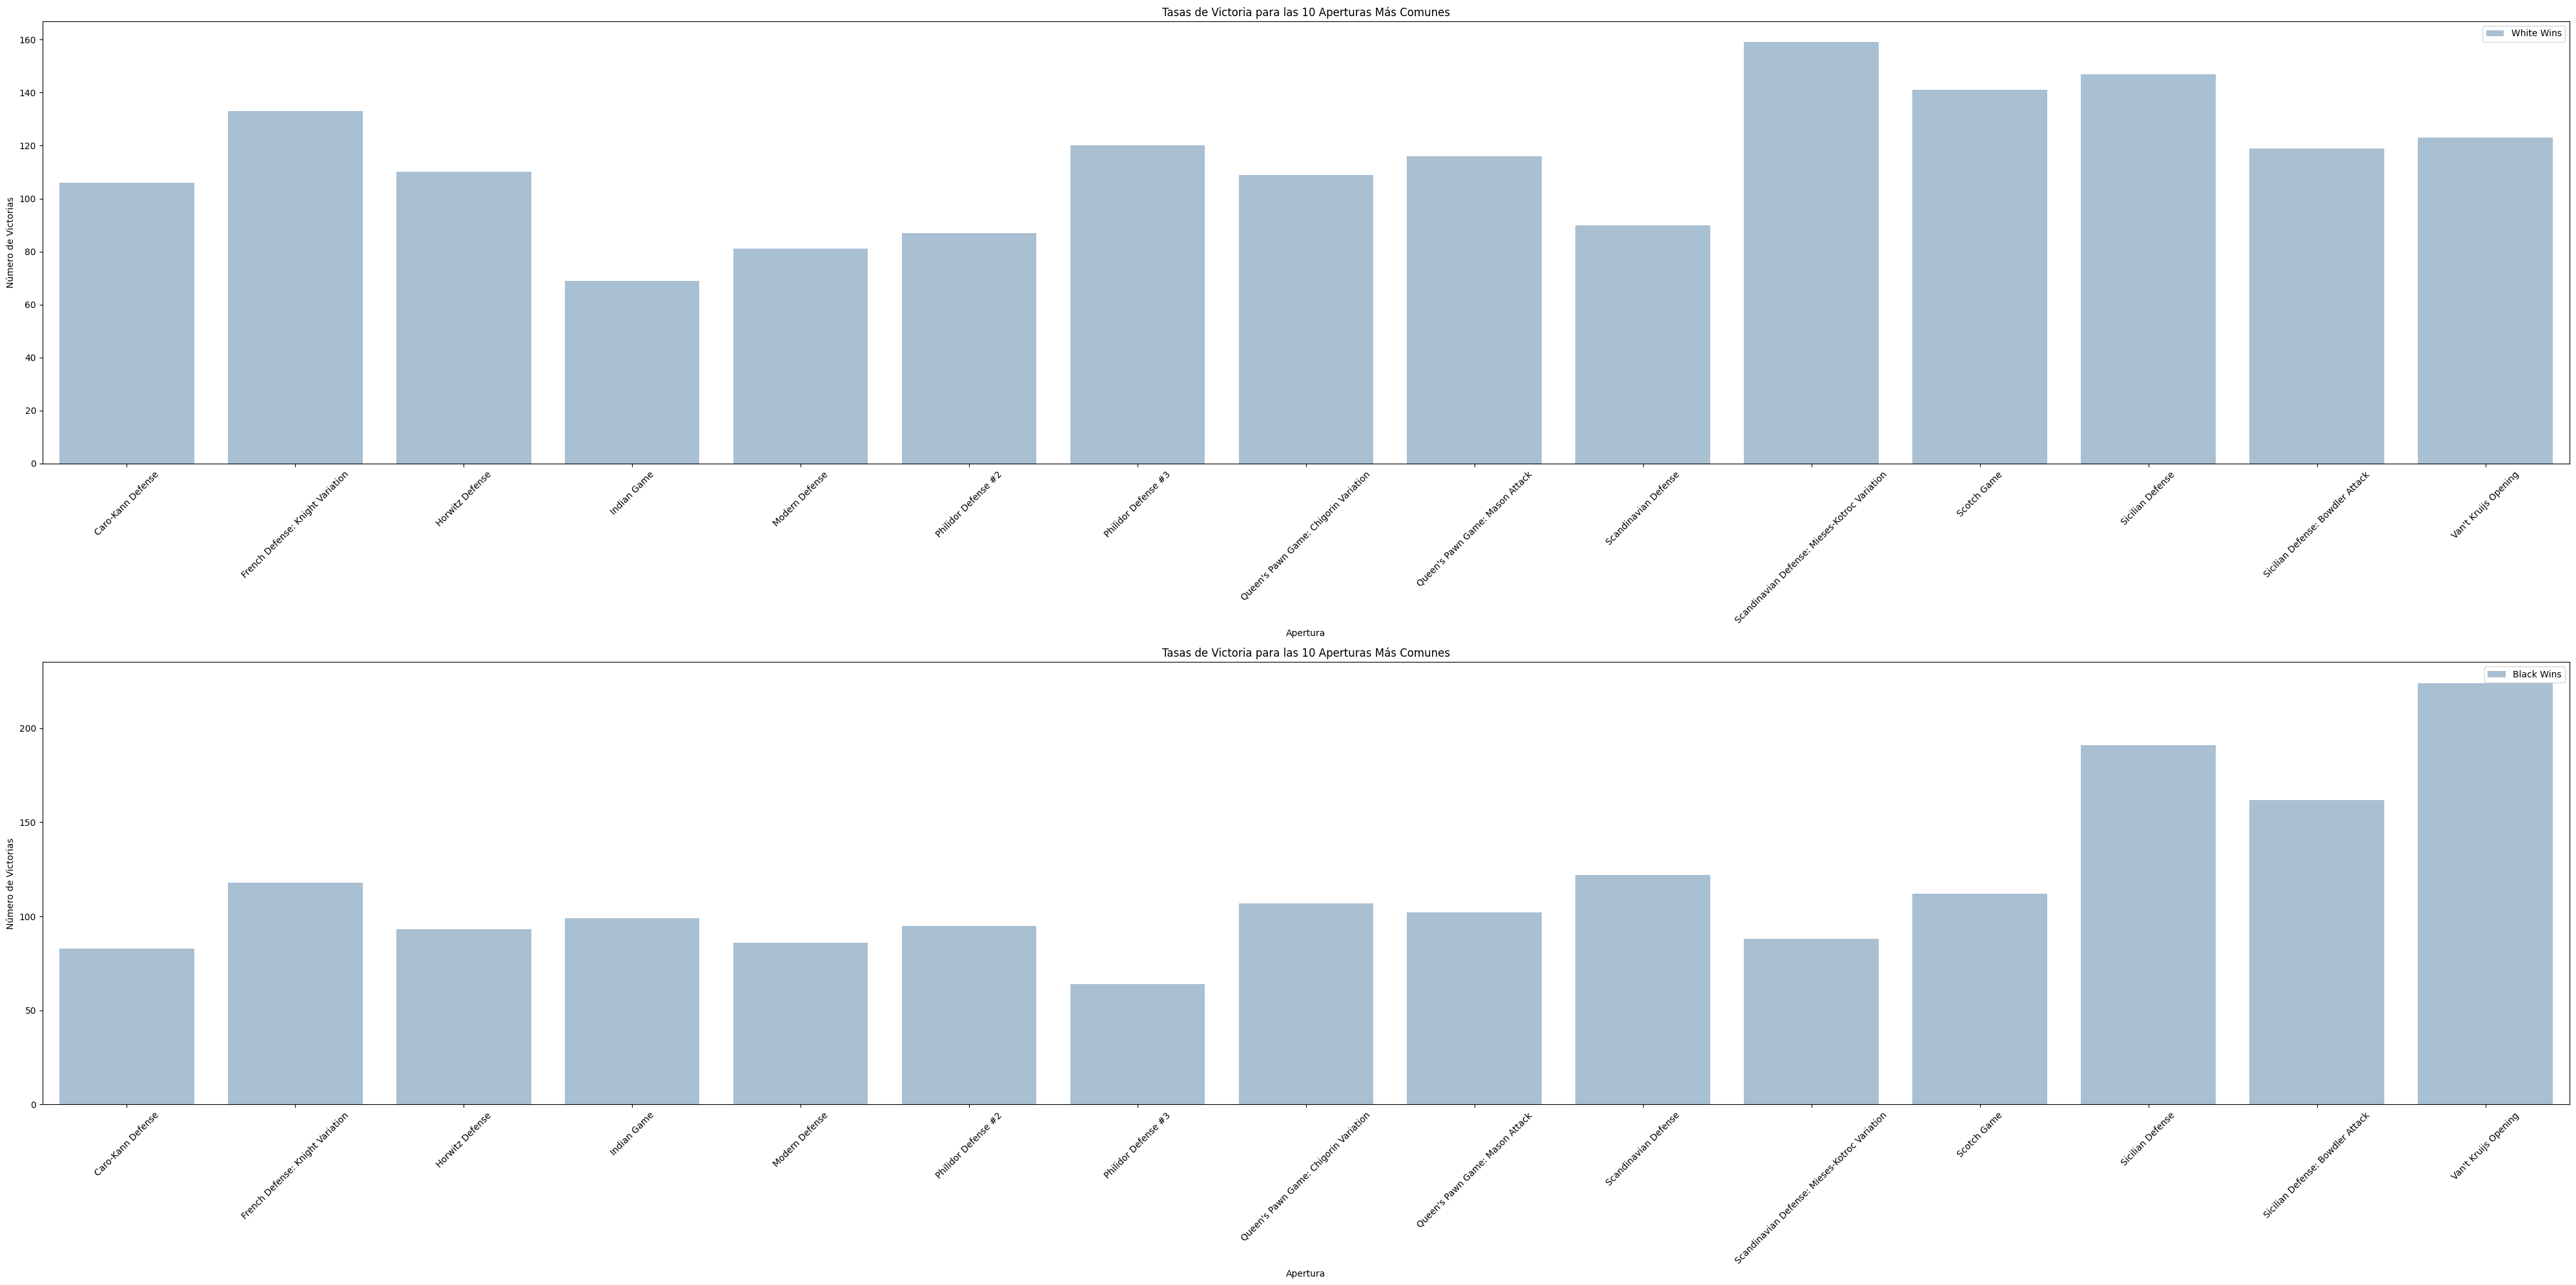

Prueba de chi-cuadrado: chi2=110.1524256120179, p-value=1.078663134908653e-11, grados de libertad 28


In [5]:
'''
Hipótesis 2A: Ciertas aperturas específicas tienen una mayor tasa de victorias para las blancas o las negras.


'''
from scipy.stats import chi2_contingency

# Focalizándonos en las 10 aperturas más comunes
common_openings = chess_data_cleaned['opening_name'].value_counts().head(15).index
top_openings_data = chess_data_cleaned[chess_data_cleaned['opening_name'].isin(common_openings)]

# Calculando las tasas de victoria para blancas y negras
opening_win_rates = top_openings_data.groupby(['opening_name', 'winner']).size().unstack().fillna(0)

# Prueba de chi-cuadrado
chi2, p_val, dof, ex = chi2_contingency(opening_win_rates)

# Visualización con Seaborn
fig, axs = plt.subplots(2,1,figsize=(40, 20))
sns.barplot(data=opening_win_rates[['white', 'black']].reset_index(), x='opening_name', y='white', color='steelblue', label='White Wins',alpha = 0.5, ax=axs[0])
sns.barplot(data=opening_win_rates[['white', 'black']].reset_index(), x='opening_name', y='black', color='steelblue', label='Black Wins',alpha = 0.5,ax=axs[1])
axs[0].set_title('Tasas de Victoria para las 10 Aperturas Más Comunes')
axs[0].set_xlabel('Apertura' )
axs[0].set_ylabel('Número de Victorias')
axs[0].tick_params(axis='x', rotation=45)
axs[1].set_title('Tasas de Victoria para las 10 Aperturas Más Comunes')
axs[1].set_xlabel('Apertura')
axs[1].set_ylabel('Número de Victorias')
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print(f"Prueba de chi-cuadrado: chi2={chi2}, p-value={p_val}, grados de libertad {dof}")

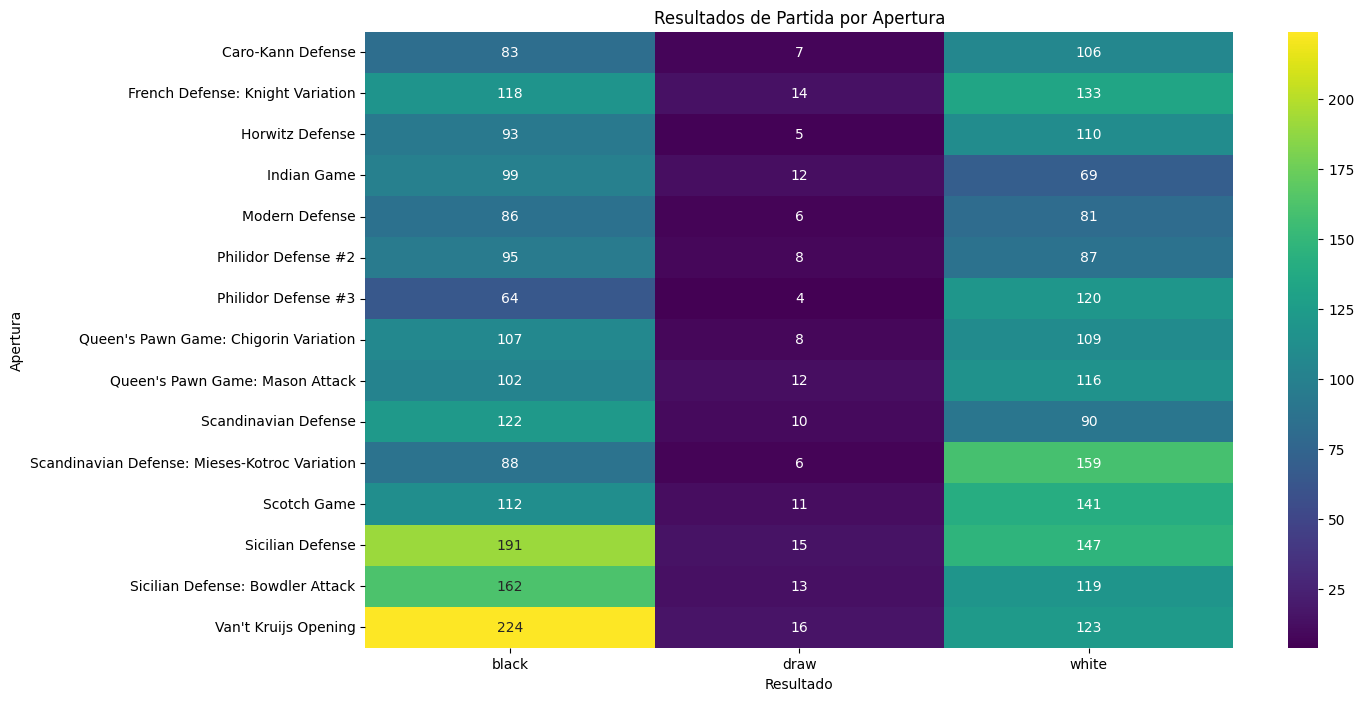

Prueba de chi-cuadrado: chi2=110.1524256120179, p-value=1.078663134908653e-11, Grados de libertad 28


In [43]:
'''
Hipótesis 2B: El resultado de la partida (victoria de blancas o negras) depende del tipo de apertura utilizado.

'''

from scipy.stats import chi2_contingency

# Focalizándonos en las 10 aperturas más comunes
common_openings = chess_data_cleaned['opening_name'].value_counts().head(15).index
top_openings_data = chess_data_cleaned[chess_data_cleaned['opening_name'].isin(common_openings)]

# Resultado de la partida según la apertura
opening_results = top_openings_data.groupby(['opening_name', 'winner']).size().unstack().fillna(0)

# Prueba de chi-cuadrado
chi2, p_val, dof, ex = chi2_contingency(opening_results)

# Visualización con Seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(opening_results, annot=True, fmt="d", cmap="viridis")
plt.title('Resultados de Partida por Apertura')
plt.xlabel('Resultado')
plt.ylabel('Apertura')
plt.show()

print(f"Prueba de chi-cuadrado: chi2={chi2}, p-value={p_val}, Grados de libertad {dof}")